In [1]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline

In [2]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/DGI-Lab/master/"
os.makedirs(data_path, exist_ok=True)
for filename in ("JeuDonnees.xlsx", "REPARTITION_CAPITAL_VF.xlsx"):
    print("Downloading", filename)
    url = download_path + "day1/datasets/" + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [3]:
df = pd.read_excel(data_path + 'JeuDonnees.xlsx', sheet_name='Feuil1', index_col=0)

In [4]:
df.head()

,RS,CA N-2,CA N-1,CA N,CA Recoupé N,Actif Immobilisé N-1,Actif Immobilisé N-2,Valeur ajoutée N,Résultat Non courants N,Capital N-1,Capital N-2,Compte courant d'associé N,Total des provisions N,Total des charges N,Résultat Fiscal N,Impot sur les sociétés N,TVA payée N,IR/Salaires N
IF,,,,,,,,,,,,,,,,,,
1,A1,7178441,7814773,6851155,11767321,302559,288373,882728,5995172,888847,882068,623598,4249352,7462131,-610976,342557.75,6851155,163170.00
2,A2,21932352,14729361,37572976,66171702,1428986,4680364,2969267,17709267,5974690,5452345,2148813,6099573,40904080,-3331104,1878648.80,37572976,4296043.00
3,A3,88384108,128385712,133057855,160404401,6326353,10501838,26390109,-36615009,26425988,14586791,5054016,131395152,144263655,-11205800,6652892.75,133057855,5269547.25
4,A4,235255933,659113375,976680022,1065571940,87470874,33041673,104702196,-593617798,190893505,190093454,147614055,372204189,882736427,93943595,48834001.10,976680022,47191497.25
5,A5,9104143,6695557,5231630,12396321,360550,299936,926273,4525974,703165,751733,460982,3979404,4983471,248159,261581.50,5231630,190195.75


In [20]:
df.iloc[:, 1:-1]

,CA N-2,CA N-1,CA N,CA Recoupé N,Actif Immobilisé N-1,Actif Immobilisé N-2,Valeur ajoutée N,Résultat Non courants N,Capital N-1,Capital N-2,Compte courant d'associé N,Total des provisions N,Total des charges N,Résultat Fiscal N,Impot sur les sociétés N,TVA payée N
IF,,,,,,,,,,,,,,,,
1,7178441,7814773,6851155,11767321,302559,288373,882728,5995172,888847,882068,623598,4249352,7462131,-610976,342557.75,6851155
2,21932352,14729361,37572976,66171702,1428986,4680364,2969267,17709267,5974690,5452345,2148813,6099573,40904080,-3331104,1878648.80,37572976
3,88384108,128385712,133057855,160404401,6326353,10501838,26390109,-36615009,26425988,14586791,5054016,131395152,144263655,-11205800,6652892.75,133057855
4,235255933,659113375,976680022,1065571940,87470874,33041673,104702196,-593617798,190893505,190093454,147614055,372204189,882736427,93943595,48834001.10,976680022
5,9104143,6695557,5231630,12396321,360550,299936,926273,4525974,703165,751733,460982,3979404,4983471,248159,261581.50,5231630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,77589515,178466208,155800210,164828119,11611772,7292214,25264458,142622147,29559226,28540135,17510523,24107641,142522896,13277314,7790010.50,155800210
9995,213930766,790170023,515797146,551888125,37072103,75625704,87814274,-231630249,84848470,91962255,62417219,100171574,541474337,-25677191,25789857.30,515797146
9996,7950468,8385259,7010132,10144098,236636,382578,455618,3369193,1344531,961940,1165334,2962326,7071271,-61139,350506.60,7010132


In [58]:
from sklearn.decomposition import PCA

X = df.iloc[:, 1:-1]
d = 2
pca = PCA(n_components = d)
Xd = pca.fit_transform(X)

In [59]:
Xd_inv = pca.inverse_transform(Xd)
Xd_inv

array([[ 2.30434949e+07,  2.31141151e+07, -1.34482592e+05, ...,
         2.67648751e+05, -6.72412959e+03, -1.34482592e+05],
       [ 4.91249140e+07,  4.91091407e+07,  2.87531507e+07, ...,
         2.11033306e+05,  1.43765753e+06,  2.87531507e+07],
       [ 1.38836922e+08,  1.37058631e+08,  1.33855958e+08, ...,
        -1.81681641e+05,  6.69279791e+06,  1.33855958e+08],
       ...,
       [ 2.27666790e+07,  2.27974667e+07, -2.81507750e+05, ...,
         2.62744201e+05, -1.40753875e+04, -2.81507750e+05],
       [ 4.57513350e+07,  4.57308288e+07,  2.50788877e+07, ...,
         2.16207205e+05,  1.25394438e+06,  2.50788877e+07],
       [ 1.27531037e+08,  1.27383258e+08,  1.15095221e+08, ...,
         5.80898302e+04,  5.75476104e+06,  1.15095221e+08]])

In [60]:
pca.components_

array([[ 3.60432239e-01,  3.56999948e-01,  4.07978171e-01,
         4.29746792e-01,  3.45389890e-02,  3.52675963e-02,
         5.06772905e-02,  5.67524942e-04,  6.13593992e-02,
         6.15352210e-02,  3.38129031e-02,  2.08842078e-01,
         4.09062983e-01, -1.08481178e-03,  2.03989086e-02,
         4.07978171e-01],
       [-4.04076936e-02, -5.69015679e-02,  2.03586051e-02,
         1.85397437e-02, -4.61878353e-03, -2.47750696e-03,
         3.17565142e-03, -9.96659915e-01,  5.45323317e-03,
         3.69775128e-03,  2.37331097e-03,  5.14281767e-03,
         2.25173708e-02, -2.15876567e-03,  1.01793026e-03,
         2.03586051e-02]])

In [61]:
pca.explained_variance_ratio_

array([0.82891092, 0.07159666])

In [62]:
1 - pca.explained_variance_ratio_.sum()

0.09949242416008353

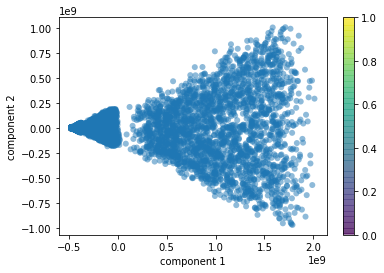

In [67]:
plt.scatter(Xd[:, 0], Xd[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

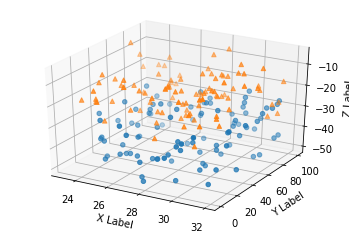

In [68]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')

plt.show()